In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

生成模拟数据

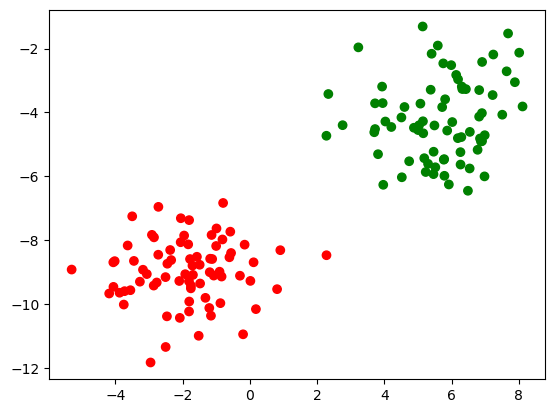

In [2]:
from sklearn.datasets._samples_generator import make_blobs
# 生成二分类模拟数据集
X,y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.2, random_state=40)
# 设置颜色数
colors = {0:'r', 1:'g'}
# 绘制二分类数据集scatter
plt.scatter(X[:,0], X[:,1], marker='o', c=pd.Series(y).map(colors))
plt.show()

In [7]:
y_ = y.copy()
y_[y_==0] = -1
y_ = y_.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_, test_size=0.3, random_state=43)
print(X_train.shape, y_train.shape)

(105, 2) (105,)


In [9]:
from cvxopt import matrix, solvers  # 求解二次规划的

In [13]:
class Hard_Margin_SVM:
    ''' 
    实现硬间隔最大化策略
    '''
    def fit(self, X, y):
        # 训练样本数和特征
        m,n = X.shape

        # 初始化二次规划的相关变量 PqGh
        self.P = matrix(np.identity(n+1, dtype=np.float))
        self.q = matrix(np.zeros((n+1,), dtype=np.float))
        self.G = matrix(np.zeros((m, n+1), dtype=np.float))
        self.h = -matrix(np.ones((m,), dtype=np.float))

        # 将数据转化为变量G
        self.P[0,0] = 0
        for i in range(m):
            self.G[i,0] = -y[i]
            self.G[i,1:] = -X[i,:]*y[i]

        # 构建二次规划求解
        sol = solvers.qp(self.P, self.q, self.G, self.h)

        # 对weights和bias求最优解
        self.w = np.zeros(n,)
        self.b = sol['x'][0]
        for i in range(1, n+1):
            self.w[i-1] = sol['x'][i]
        return self.w, self.b
    
    def predict(self, X):
        return np.sign(np.dot(self.w, X.T) + self.b)

In [14]:
# 创建hard SVM
hard_margin_svm = Hard_Margin_SVM()
# 执行训练
hard_margin_svm.fit(X_train, y_train)


/var/folders/l3/gdxbk2l908b4jq5bhgm39cl00000gn/T/ipykernel_80210/751314675.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.P = matrix(np.identity(n+1, dtype=np.float))
/var/folders/l3/gdxbk2l908b4jq5bhgm39cl00000gn/T/ipykernel_80210/751314675.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.q = matrix(np.zeros((n+1,), d

     pcost       dcost       gap    pres   dres
 0:  2.1061e-02  2.0725e+01  3e+02  2e+00  8e+02
 1:  1.7678e-01 -4.0311e+01  5e+01  3e-01  1e+02
 2:  2.5467e-01 -1.3854e+00  2e+00  1e-02  4e+00
 3:  2.1218e-01  4.0205e-02  2e-01  6e-04  2e-01
 4:  1.8309e-01  1.5738e-01  3e-02  8e-05  4e-02
 5:  1.8241e-01  1.8207e-01  3e-04  1e-06  4e-04
 6:  1.8239e-01  1.8239e-01  3e-06  1e-08  4e-06
 7:  1.8239e-01  1.8239e-01  3e-08  1e-10  4e-08
Optimal solution found.


(array([0.40882768, 0.44457681]), 1.8310613288772002)

In [15]:
y_pred = hard_margin_svm.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [18]:
# 绘图查看分类效果
from matplotlib.colors import ListedColormap

def plot_classifer(model, X, y):
    # hyperparams bound
    x_min, x_max, y_min, y_max = -7, 12, -12, -1
    step = 0.05
    xx,yy = np.meshgrid(np.arange(x_min, x_max, step),
                        np.arange(y_min, y_max, step))
    # 模型预测
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # 定义color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000','#003300'])
    z = z.reshape(xx.shape)

    plt.figure(figsize=(8,5), dpi=96)
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.show()

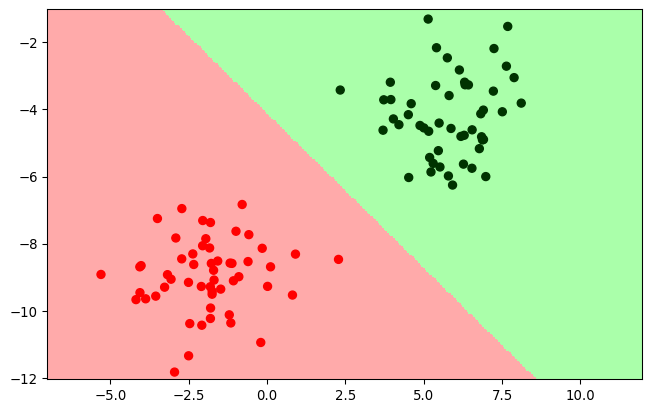

In [19]:
plot_classifer(hard_margin_svm, X_train, y_train)